In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [3]:
df=pd.read_csv('advertising.csv')
print(df.describe())

               TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


In [4]:
def estimate_coef(x, y):
    n = np.size(x)
    m_x = np.mean(x)
    m_y = np.mean(y)

    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x

    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
    return (b_0, b_1)
df['total'] = df['TV'] + df['radio'] + df['newspaper']
b,a=estimate_coef(df['total'],df['sales'])
print(b,a)

4.243028216036338 0.04868787931904811


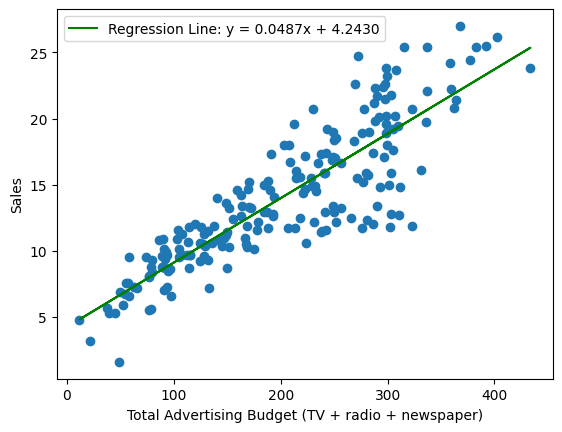

In [5]:
plt.scatter(df['total'], df['sales'])
y_pred = b + a * df['total']
plt.plot(df['total'], y_pred, color='g', label=f'Regression Line: y = {a:.4f}x + {b:.4f}')

plt.xlabel('Total Advertising Budget (TV + radio + newspaper)')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [6]:
x=df[['total']]
y=df['sales']


In [7]:
X_train, X_test, y_train, y_test = train_test_split(x ,y, test_size=0.3, random_state=45)

In [13]:
degrees = range(3, 11)
min_mse = float('inf')
best_degree = None
best_coefficients = None
all_coeff = []
all_rmse = []
all_r2 = []
all_mse=[]

for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_pred = model.predict(X_test_poly)
 
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    all_coeff.append(model.coef_)
    all_rmse.append(rmse)
    all_r2.append(r2)
    all_mse.append(mse)

    if mse < min_mse:
        min_mse = mse
        best_degree = degree
        best_coefficients = model.coef_

print(f"Best Polynomial Degree: {best_degree}")
print(f"Coefficients for Best Polynomial (Degree {best_degree}):\n", best_coefficients)
print("All Coefficients:", all_coeff)
print("All RMSE:", all_rmse)
print("All R2:", all_r2)
print("All MSE:", all_mse)

Best Polynomial Degree: 7
Coefficients for Best Polynomial (Degree 7):
 [ 0.00000000e+00  3.91084885e-05  2.20634909e-03 -3.11688161e-05
  2.14652238e-07 -7.79503209e-10  1.42207630e-12 -1.02169792e-15]
All Coefficients: [array([ 0.00000000e+00,  8.20452091e-02, -1.68102418e-04,  2.40705267e-07]), array([ 0.00000000e+00,  8.94979702e-02, -2.37615582e-04,  4.82706105e-07,
       -2.78946435e-10]), array([ 0.00000000e+00,  1.40960592e-02,  8.06724044e-04, -5.53879555e-06,
        1.49448147e-08, -1.39307628e-11]), array([ 0.00000000e+00,  1.30333251e-01, -1.45109361e-03,  1.36384249e-05,
       -6.45365618e-08,  1.43855202e-10, -1.19904087e-13]), array([ 0.00000000e+00,  3.91084885e-05,  2.20634909e-03, -3.11688161e-05,
        2.14652238e-07, -7.79503209e-10,  1.42207630e-12, -1.02169792e-15]), array([ 0.00000000e+00, -1.83499035e-11,  1.19315012e-11,  1.15328515e-09,
        6.50765148e-08, -6.55993762e-10,  2.55536083e-12, -4.46185206e-15,
        2.91859900e-18]), array([ 0.00000000e

In [9]:

best_degree_poly_features = PolynomialFeatures(degree=best_degree)
test_data = np.array([ [186]])#149+22+15
test_data_poly = best_degree_poly_features.fit_transform(test_data)
sales_predictions = np.dot(test_data_poly, best_coefficients)

print("Predicted Sales for [149, 22, 15]:", sales_predictions)


Predicted Sales for [149, 22, 15]: [10.16728286]


In [10]:


# Define and fit the polynomial features transformation
poly_features = PolynomialFeatures(degree=7)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Transform the single value for prediction
X_pred = poly_features.transform(np.array([[186]]))
y_pred = model.predict(X_pred)
print(y_pred)


[13.53007363]


c:\Users\prave\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


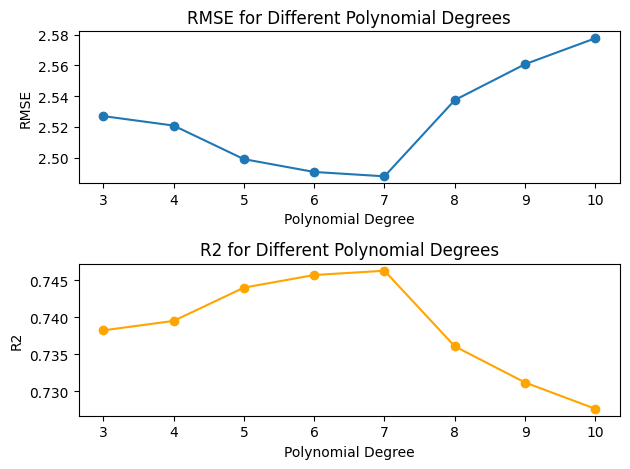

In [11]:
import matplotlib.pyplot as plt

plt.subplot(2, 1, 1)
plt.plot(degrees, all_rmse, marker='o')
plt.title('RMSE for Different Polynomial Degrees')
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')

plt.subplot(2, 1, 2)
plt.plot(degrees, all_r2, marker='o', color='orange')
plt.title('R2 for Different Polynomial Degrees')
plt.xlabel('Polynomial Degree')
plt.ylabel('R2')

plt.tight_layout()
plt.show()


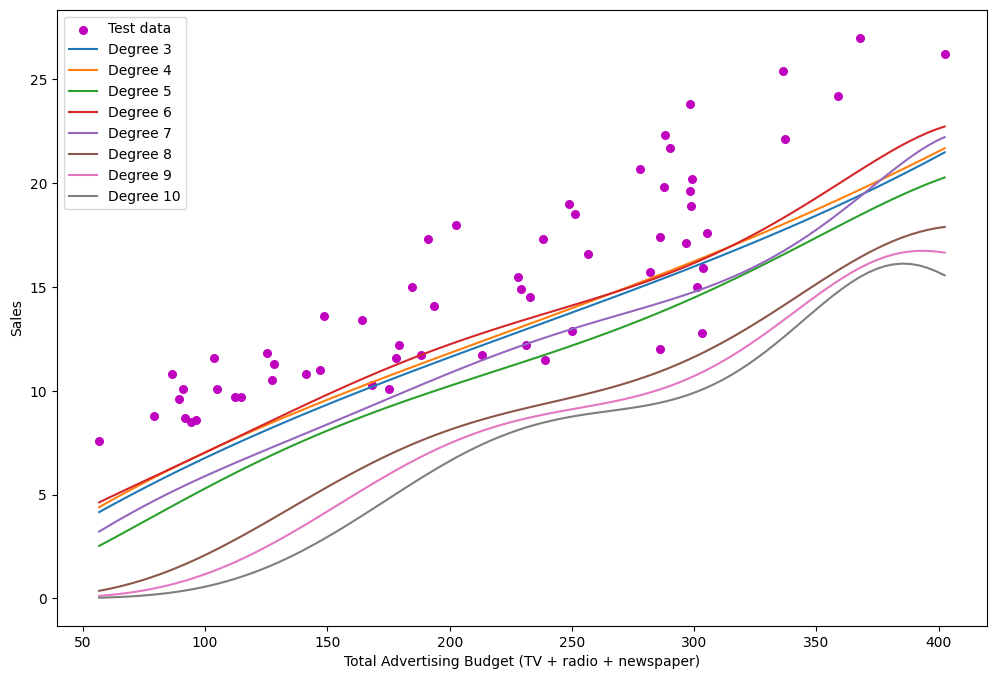

In [12]:
x_range = np.linspace(X_test.min(), X_test.max(), 100).reshape(-1, 1)
plt.figure(figsize=(12, 8))
plt.scatter(X_test, y_test, color='m', marker='o', s=30, label='Test data')
for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_range_poly = poly_features.fit_transform(x_range)
    y_range_pred = np.dot(X_range_poly, all_coeff[degree - 3])
    plt.plot(x_range, y_range_pred, label=f'Degree {degree}')

plt.xlabel('Total Advertising Budget (TV + radio + newspaper)')
plt.ylabel('Sales')
plt.legend()
plt.show()


[150.]


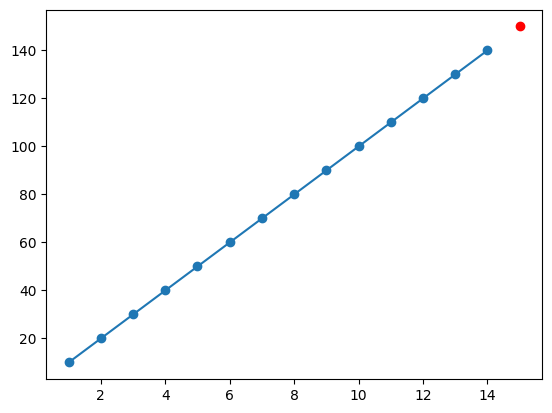

In [21]:
x1 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]).reshape(-1, 1)
y1 = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140])

model1=LinearRegression()
model1.fit(x1,y1)
y_p=model1.predict([[15]])
print(y_p)
plt.scatter(x1,y1)
plt.scatter([[15]],y_p,color='red')
plt.plot(x1,y1)

Prediction for x=15: [150.]


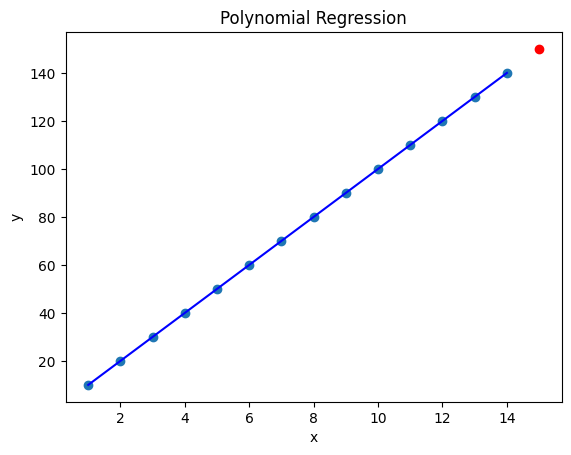

In [23]:


# Create polynomial features
poly = PolynomialFeatures(degree=2)  # Adjust degree as needed
x_poly = poly.fit_transform(x1)

# Create and fit linear regression model on polynomial features
model_poly = LinearRegression()
model_poly.fit(x_poly, y1)

# Predict for new values
x_new = np.array([[15]])
x_new_poly = poly.fit_transform(x_new)
y_p = model_poly.predict(x_new_poly)
print("Prediction for x=15:", y_p)

# Plotting
plt.scatter(x1, y1)
plt.scatter(x_new, y_p, color='red')
plt.plot(x1, model_poly.predict(x_poly), color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression')
plt.show()


In [39]:
data = pd.DataFrame({'Brand': ['Maruti', 'Hyundai', 'Tata',
                               'Mahindra', 'Maruti', 'Hyundai',
                               'Renault', 'Tata', 'Maruti'],
                     'Year': [2012, 2014, 2011, 2015, 2012,
                              2016, 2014, 2018, 2019],
                     'Kms Driven': [50000, 30000, 60000,
                                    25000, 10000, 46000,
                                    31000, 15000, 12000],
                     'City': ['Gurgaon', 'Delhi', 'Mumbai',
                              'Delhi', 'Mumbai', 'Delhi',
                              'Mumbai', 'Chennai',  'Ghaziabad'],
                     'Mileage':  [28, 27, 25, 26, 28,
                                  29, 24, 21, 24]})

In [46]:

# selecting cars with brand 'Maruti' and Mileage > 25
print(data.loc[(data.Brand == 'Maruti') & (data.Mileage > 25)])

# selecting range of rows from 2 to 5
display(data.loc[2: 5])

# updating values of Mileage if Year < 2015
data.loc[(data.Year < 2015), ['Mileage']] = 22
display(data)


    Brand  Year  Kms Driven       City  Mileage
0  Maruti  2012       50000    Gurgaon       99
4  Maruti  2012       10000     Mumbai       99
8  Maruti  2019       12000  Ghaziabad       99


,Brand,Year,Kms Driven,City,Mileage
2,Tata,2011,60000,Mumbai,99
3,Mahindra,2015,25000,Delhi,99
4,Maruti,2012,10000,Mumbai,99
5,Hyundai,2016,46000,Delhi,99


,Brand,Year,Kms Driven,City,Mileage
0,Maruti,2012,50000,Gurgaon,22
1,Hyundai,2014,30000,Delhi,22
2,Tata,2011,60000,Mumbai,22
3,Mahindra,2015,25000,Delhi,99
4,Maruti,2012,10000,Mumbai,22
5,Hyundai,2016,46000,Delhi,99
6,Renault,2014,31000,Mumbai,22
7,Tata,2018,15000,Chennai,99
8,Maruti,2019,12000,Ghaziabad,99


In [28]:

# selecting 0th, 2nd, 4th, and 7th index rows
display(data.iloc[[0, 2, 4, 7]])

# selecting rows from 1 to 4 and columns from 2 to 4
display(data.iloc[1: 5, 2: 5])

,Brand,Year,Kms Driven,City,Mileage
0,Maruti,2012,50000,Gurgaon,22
2,Tata,2011,60000,Mumbai,22
4,Maruti,2012,10000,Mumbai,22
7,Tata,2018,15000,Chennai,21


,Kms Driven,City,Mileage
1,30000,Delhi,22
2,60000,Mumbai,22
3,25000,Delhi,26
4,10000,Mumbai,22
